In [1]:
from dumbbells.dataset import *
from dumbbells.agent import *
from dumbbells.q_functions import *
from dumbbells.models import *
from dumbbells.trainer import *

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
env = "MountainCar-v0"
memory_buffer = 10000

gamma = 0.999
arch = FcSimpleDqn

eps_start = 0.9
eps_end = 0.05
eps_decay = 200

dataset = Dataset(env, memory_buffer)
arch = arch(dataset.state_space.shape[0], dataset.action_space.n)
q_func = DnnQFunction(arch, gamma)
agent = Agent(
    q_func, 
    dataset.action_space, 
    dataset.state_space, 
    dataset.reward_space, 
    eps_start, 
    eps_end, 
    eps_decay
)


In [3]:
trainer = Trainer(dataset, agent, batch_size=32)
trainer.train(1000)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/donatas/Projects/mif-notes/machine-learning/dumbbells/dumbbells/q_functions.py:91: UserWarning: Using a target size (torch.Size([32, 1, 1])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(
 31%|███       | 307/1000 [00:04<00:09, 71.28it/s]/Users/donatas/Projects/mif-notes/machine-learning/dumbbells/dumbbells/q_functions.py:91: UserWarning: Using a target size (torch.Size([16, 1, 1])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(
100%|██████████| 1000/1000 [00:14<00:00, 68.70it/s]


len(dataset) = 10000
len(trainer.ep_durations) = 1000


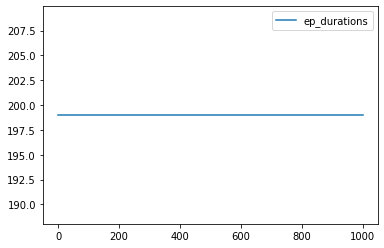

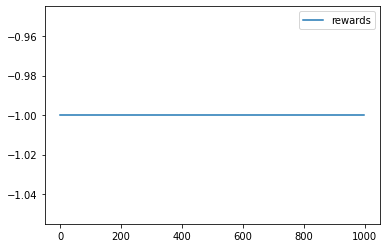

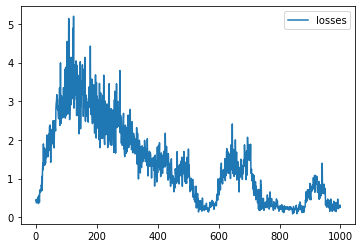

In [4]:
print(f"{len(dataset) = }")
print(f"{len(trainer.ep_durations) = }")

plt.plot(trainer.ep_durations, label="ep_durations")
plt.legend()
plt.show()

plt.plot(trainer.rewards, label="rewards")
plt.legend()
plt.show()

plt.plot(trainer.losses, label="losses")
plt.legend()
plt.show()